In [23]:
# librairies import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

This project use a dataset sourced from **aijobs.net** found on **kaggle.com**. 

https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/data

# Exploratory Data Analysis

In [4]:
data = pd.read_csv("ds_salaries.csv")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
# dimensions of dataset
data.shape

(3755, 11)

In [9]:
# first 5 rows, to see structure of dataset
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


We have a dataset with **3755** observations representing each an employee and **11** variables that are informations about their job. We have 4 numerical variables and 7 categorical variables, which are : 

- **work_year** : the year the salary was paid
- **experience_level**: the experience level in the job during the year
- **employment_type**: the type of employment for the role
- **job_title**: the role worked in during the year.
- **salary**: the total gross salary amount paid.
- **salary_currency**: the currency of the salary paid as an ISO 4217 currency code.
- **salary_in_usd**: the salary in USD
- **employee_residence**: employee's primary country of residence in during the work year as an ISO 3166 country code.
- **remote_ratio**: the overall amount of work done remotely
- **company_location**: the country of the employer's main office or contracting branch
- **company_size**: the median number of people that worked for the company during the year

In [13]:
data.isna().sum().sum()
# no missing variables

0

In [16]:
# separate num and categorical variables
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(exclude=np.number)

In [17]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   work_year      3755 non-null   int64
 1   salary         3755 non-null   int64
 2   salary_in_usd  3755 non-null   int64
 3   remote_ratio   3755 non-null   int64
dtypes: int64(4)
memory usage: 117.5 KB


In [18]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   experience_level    3755 non-null   object
 1   employment_type     3755 non-null   object
 2   job_title           3755 non-null   object
 3   salary_currency     3755 non-null   object
 4   employee_residence  3755 non-null   object
 5   company_location    3755 non-null   object
 6   company_size        3755 non-null   object
dtypes: object(7)
memory usage: 205.5+ KB


## Univariate analysis 

### Numerical variables



In [25]:
data_num.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


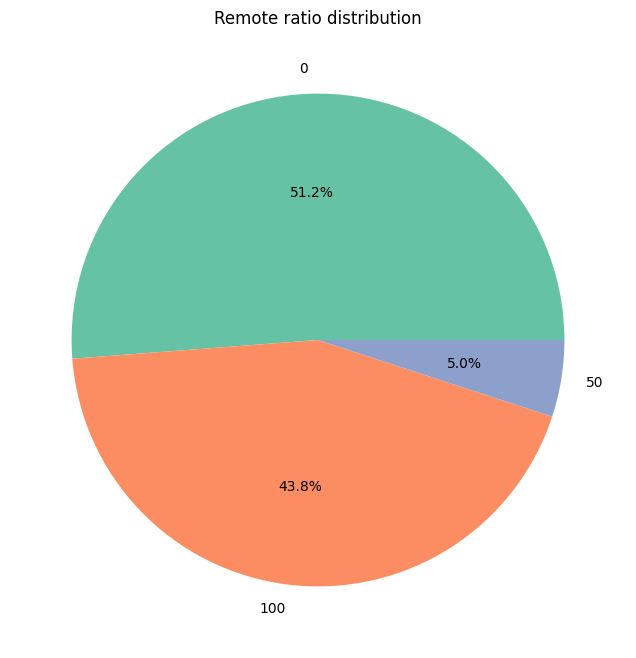

In [37]:
plt.figure(figsize=(8,8))
counts_remote = data['remote_ratio'].value_counts()
plt.pie(counts_remote.values, labels=counts_remote.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Remote ratio distribution")
plt.show()

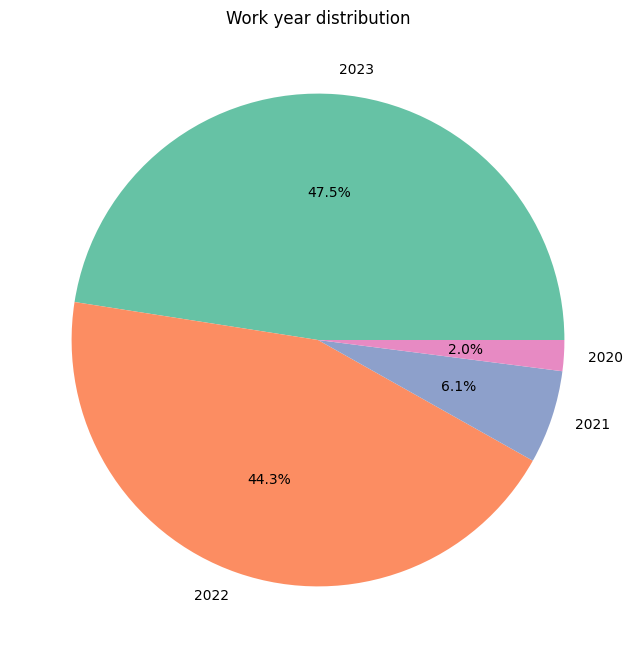

In [35]:
plt.figure(figsize=(8,8))
counts_year = data['work_year'].value_counts()
plt.pie(counts_year.values, labels=counts_year.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Work year distribution")
plt.show()

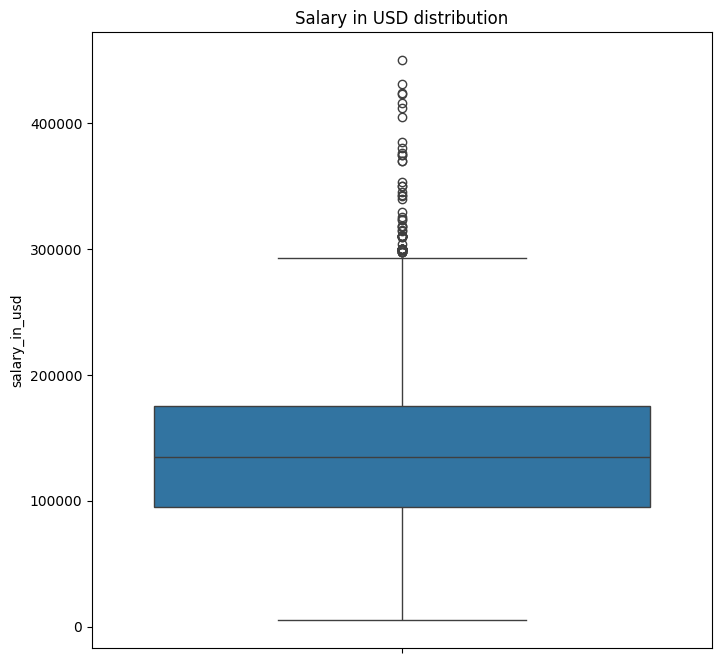

In [43]:
plt.figure(figsize=(8,8))
sns.boxplot(data['salary_in_usd'])
plt.title("Salary in USD distribution")
plt.show()